<a href="https://colab.research.google.com/github/eleaz1/DataAnalist/blob/main/Taller1/Taller_analisis_de_datos_para_la_toma_de_decisiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taller análisis de datos para la toma de decisiones**


---

Integrantes:
Iván Eleazar Agudelo Benavides

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install tableone

## Cargue de información y limpieza de datos

In [3]:
URL = "https://raw.githubusercontent.com/it-ces/Datasets/main/tallermicro.csv"
df = pd.read_csv(URL)
df = df.drop('Unnamed: 0', axis=1)
# df['state'].unique()
df = df.rename(columns={'q(uantities)': 'quantities'})
df['state'] = df['state'].apply(lambda x: 'liquidación' if x.startswith('liqu') else x)
# df['state'].value_counts()
df.head()


,totalCost(q+1),totalCost(q),quantities,prices,state
0,2024,2000,101,24,activa
1,1473,1464,184,19,activa
2,3794,3774,223,2,activa
3,1431,1414,102,17,activa
4,1934,1920,161,14,activa


## Calcular costo promedio

In [4]:
# Calcular costo promedio
df['averageCost'] = df['totalCost(q)'] / df['quantities']
df

,totalCost(q+1),totalCost(q),quantities,prices,state,averageCost
0,2024,2000,101,24,activa,19.801980
1,1473,1464,184,19,activa,7.956522
2,3794,3774,223,2,activa,16.923767
3,1431,1414,102,17,activa,13.862745
4,1934,1920,161,14,activa,11.925466
...,...,...,...,...,...,...
245,540,536,135,4,activa,3.970370
246,2844,2820,142,18,liquidación,19.859155
247,2741,2712,114,3,activa,23.789474
248,2125,2100,101,21,activa,20.792079


## Calcular el costo marginal

In [5]:
# Calcular el costo marginal
# El costo marginal es el cambio en el costo total dividido por el cambio en la cantidad
df['MarginalCost'] = df['totalCost(q+1)'] - df['totalCost(q)']
df

,totalCost(q+1),totalCost(q),quantities,prices,state,averageCost,MarginalCost
0,2024,2000,101,24,activa,19.801980,24
1,1473,1464,184,19,activa,7.956522,9
2,3794,3774,223,2,activa,16.923767,20
3,1431,1414,102,17,activa,13.862745,17
4,1934,1920,161,14,activa,11.925466,14
...,...,...,...,...,...,...,...
245,540,536,135,4,activa,3.970370,4
246,2844,2820,142,18,liquidación,19.859155,24
247,2741,2712,114,3,activa,23.789474,29
248,2125,2100,101,21,activa,20.792079,25


## Determinar el número de empresas que se encuentran maximizando el beneficio.

In [6]:
# Determinar el número de empresas que se encuentran maximizando el beneficio.
print('Son '+str(len(df[df['prices'] == df['MarginalCost']]) )+' las empresas que se encuentran maximizando el beneficio')

Son 93 las empresas que se encuentran maximizando el beneficio


## Determine que empresas activas tienen un beneficio positivo.

In [7]:
# Determine que empresas activas tienen un beneficio positivo.
df['Income'] = df['quantities']*df['prices']
df['Profits'] = df['Income'] - df['totalCost(q)']
active_companies = df.loc[(df['Profits'] > 0) & (df['state'] == 'activa'), 'Profits'].count()

print('Son '+str(active_companies)+' las empresas activas tienen un beneficio positivo')


Son 139 las empresas activas tienen un beneficio positivo


## Determine que empresas no-activas o en liquidaci´on tienen un beneficio negativo.

In [8]:
# Determine que empresas no-activas o en liquidaci´on tienen un beneficio negativo.
no_active = df.loc[((df['state'] == 'liquidación') | (df['state'] == 'no-activa')) & (df['Profits'] < 0), 'Profits'].count()
print('Son '+str(no_active)+' las empresas no-activas o en liquidaci´on tienen un beneficio negativo')


Son 24 las empresas no-activas o en liquidaci´on tienen un beneficio negativo


## Determinar la participación del ingreso de cada empresa al sector (realice una gráfica para esto)

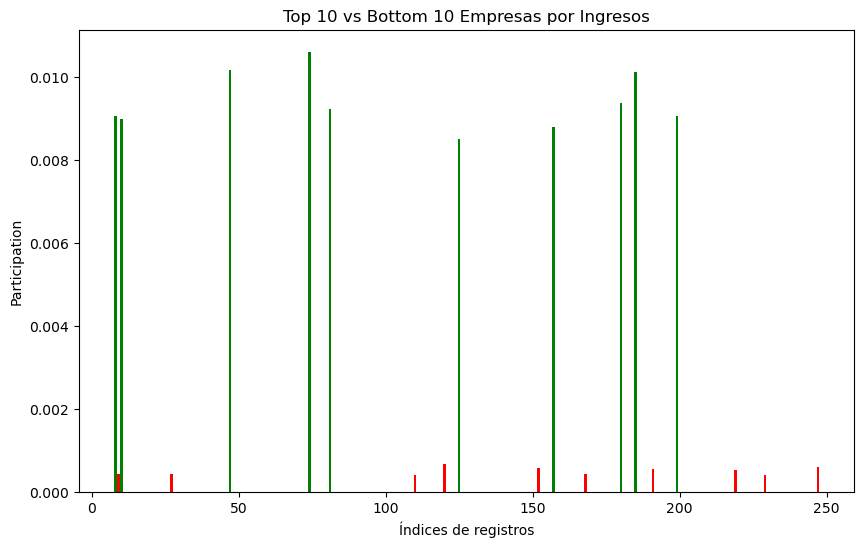

In [9]:
totalIncome = df['Income'].sum()
df['Participation'] = (df['Income'] / totalIncome)

# 10 top vs 10 low
# Ordenamos el DataFrame por la columna 'Participation'
df_sorted = df.sort_values(by='Participation')

# Tomamos las primeras y últimas 10 filas para las empresas con mayores y menores participaciones respectivamente
top_10 = df_sorted.tail(10)
bottom_10 = df_sorted.head(10)

# Creamos un nuevo DataFrame solo con las 10 empresas de cada categoría para facilitar la visualización
top_bottom_10 = pd.concat([top_10, bottom_10])

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_bottom_10.index, top_bottom_10['Participation'], color=['green']*10 + ['red']*10)
plt.ylabel('Participation')
plt.xlabel('Índices de registros')
plt.title('Top 10 vs Bottom 10 Empresas por Ingresos')
plt.show()


## Determinar cuales son los percentiles 25,50,75 para los ingresos, y en que percentil se encuentra cada empresa.

In [10]:
df.describe()
# Calculando los percentiles
percentil_25 = df['Income'].quantile(0.25)
percentil_50 = df['Income'].quantile(0.50)
percentil_75 = df['Income'].quantile(0.75)

# Función para determinar la ubicación de los datos en relación con los percentiles
def define_position(data):
    if data <= percentil_25:
        return 'Percentile 25'
    elif data <= percentil_50:
        return 'Percentile 50'
    elif data <= percentil_75:
        return 'Percentile 75'
    else:
        return 'above the 75'

# Agregando la columna de ubicaciones
df['Position'] = df['Income'].apply(define_position)
df

,totalCost(q+1),totalCost(q),quantities,prices,state,averageCost,MarginalCost,Income,Profits,Participation,Position
0,2024,2000,101,24,activa,19.801980,24,2424,424,0.004271,Percentile 75
1,1473,1464,184,19,activa,7.956522,9,3496,2032,0.006160,above the 75
2,3794,3774,223,2,activa,16.923767,20,446,-3328,0.000786,Percentile 25
3,1431,1414,102,17,activa,13.862745,17,1734,320,0.003056,Percentile 50
4,1934,1920,161,14,activa,11.925466,14,2254,334,0.003972,Percentile 75
...,...,...,...,...,...,...,...,...,...,...,...
245,540,536,135,4,activa,3.970370,4,540,4,0.000952,Percentile 25
246,2844,2820,142,18,liquidación,19.859155,24,2556,-264,0.004504,Percentile 75
247,2741,2712,114,3,activa,23.789474,29,342,-2370,0.000603,Percentile 25
248,2125,2100,101,21,activa,20.792079,25,2121,21,0.003737,Percentile 75


## Determine si existen o no diferencias significativas de los costos e ingresos entre empresas en liquidación y activas.

In [11]:
X = ['totalCost(q)','Income', 'state']
df2 = df[X]
dfCompare = df2.copy()
dfCompare

,totalCost(q),Income,state
0,2000,2424,activa
1,1464,3496,activa
2,3774,446,activa
3,1414,1734,activa
4,1920,2254,activa
...,...,...,...
245,536,540,activa
246,2820,2556,liquidación
247,2712,342,activa
248,2100,2121,activa


In [13]:

# Algortihm Table One
from tableone  import TableOne, load_dataset
from scipy import stats
categorial = []
nonormal   = []
normal     = []
for t in df2.columns:
    print(dfCompare[t].dtypes, t)
    if dfCompare[t].dtypes=="object" or dfCompare[t].dtypes.name=='category':
        categorial.append(t)
    if dfCompare[t].dtypes=="int64" or dfCompare[t].dtypes=="float64":
            n,p = stats.shapiro(dfCompare[t])
            if p<0.05:
                nonormal.append(t)
            else:
                normal.append(t)

print(len(dfCompare.columns))
print(len(normal) + len(nonormal) + len(categorial))
mytable = TableOne(dfCompare,categorical=categorial, nonnormal=nonormal, pval=True, groupby='state')
mytable
mytable.to_excel('tableOne.xlsx')

int64 totalCost(q)
int64 Income
object state
3
3
